In [1]:
from WenXuan import WenXuan
from bs4 import BeautifulSoup
import re
from matplotlib import pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = "retina"

# Organize WenXuan into Text and Comment Tuples

In this notebook, we would try to split texts and commentaries in WenXuan into a list of tuples. The final goal is to analyze the ÊùéÂñÑ commentaries in WenXuan. Because Han-Ji used smaller fontsize for both commentaries and sound glosses, we have to get rid of the sound glosses first.

## Loading Data for WenXuan

At first, we can load the raw html pages from the `data/` folder. 

In [2]:
wenxuan = WenXuan("2018-06-02", "MF" )
wenxuan.bookname = "wenshuan_rare_sinica_char"
wenxuan.load_htmls()

[Info] Stop at loading data/wenshuan_rare_sinica_char_0582.html.
[Info] Total length of the data is 582.


In [3]:
len(wenxuan.flat_bodies)

582

In the `wenxuan.flat_bodies` attribute, we have a list of `bs4` object stands for the raw page from WenXuan. Because we want to design further methods to organize the information in WenXuan, saving a list of `bs4` objects could help us to save our time to looping over the HanJi web page repeatedly. 

## Get the List of Bookmark

Since we have a list of `bs4` soup, we can loop over it and get the bookmark on every pages via, 

```python
    for soup in self.flat_bodies:
        # extract gobookmark
        path  = soup.find('a', attrs={'class', 'gobookmark'}).text
        self.paths.append(path)
```
and save in the `wenxuan.paths`.


In [4]:
wenxuan.extract_paths()

In [ ]:
# preview some bookmarks
wenxuan.paths[:5]

## Extract MetaData 

The extraction of metadata is done by the organizing the bookmark. However, for the author names, we first extract the author names on every pages using `indent` & `padding` via `wenxuan.get_author_bag`, and `wenxuan.get_author_bag` will save author names and the comments attached on it to a `defaultdict(list)` in `wenxuan.author_bag`. And we will use the `author_bag` to cross-check the author names in the bookmarks.

In [7]:
wenxuan.get_author_bag()

[Warning] No author name in 47 item, but got a tag. Attach this tag to previous author name Èô∏Â£´Ë°°.
[Warning] No author name in 53 item, but got a tag. Attach this tag to previous author name ÁéãÂ≠êÊ∑µ.
[Warning] No author name in 62 item, but got a tag. Attach this tag to previous author name ÊõπÂ≠êÂª∫.
[Warning] No author name in 88 item, but got a tag. Attach this tag to previous author name ‰∏òÂ∏åÁØÑ.
[Warning] No author name in 95 item, but got a tag. Attach this tag to previous author name Ë¨ùÁéÑÊöâ.
[Warning] No author name in 111 item, but got a tag. Attach this tag to previous author name ÊáâÁí©.
[Warning] No author name in 117 item, but got a tag. Attach this tag to previous author name È≠èÊñáÂ∏ù.
[Warning] No author name in 187 item, but got a tag. Attach this tag to previous author name ÂäâË∂äÁü≥.
[Warning] Author name, È£≤È¶¨Èï∑ÂüéÁ™üË°å in 244, is too long. Discard this one.
[Warning] No author name in 244 item, but got a tag. Attach this tag to previous author name È°

The warning information shows that, for some comments of the author, the comments would possibly be cut off by the page divider. In that case, we would attach the comments to the previous author name in the same page.

In [8]:
# here are all the author names got from every pages
wenxuan.author_bag.keys()

dict_keys(['Áè≠Â≠üÂ†Ö', 'ÂºµÂπ≥Â≠ê', 'ËñõÁ∂úÊ≥®', 'Â∑¶Â§™Ê≤ñ', 'ÂäâÊ∑µÊûóÊ≥®', 'Ê•äÂ≠êÈõ≤', 'ÊΩòÂÆâ‰ªÅ', 'Âè∏È¶¨Èï∑Âçø', 'ÈÉ≠ÁíûÊ≥®', 'ÂæêÁà∞Ê≥®', 'Áè≠ÂèîÁöÆ', 'ÊõπÂ§ßÂÆ∂', 'Áéã‰ª≤ÂÆ£', 'Â≠´ËààÂÖ¨', 'ÈÆëÊòéÈÅ†', 'ÁéãÊñáËÄÉ', 'ÂºµËºâÊ≥®', '‰ΩïÂπ≥Âèî', 'Êú®ÁéÑËôõ', 'ÈÉ≠ÊôØÁ¥î', 'ÂÆãÁéâ', 'Ë¨ùÊÉ†ÈÄ£', 'Ë¨ùÂ∏åÈÄ∏', 'Ë≥àË™º', 'Á¶∞Ê≠£Âπ≥', 'ÂºµËåÇÂÖà', 'È°èÂª∂Âπ¥', 'ËàäÊ≥®', 'ÂêëÂ≠êÊúü', 'Èô∏Â£´Ë°°', 'Ê±üÊñáÈÄö', 'ÁéãÂ≠êÊ∑µ', 'ÂÇÖÊ≠¶‰ª≤', 'È¶¨Â≠£Èï∑', 'ÂµáÂèîÂ§ú', 'ÊàêÂÖ¨Â≠êÂÆâ', 'ÊõπÂ≠êÂª∫', 'ÊùüÂª£ÂæÆ', 'Ë¨ùÈùàÈÅã', 'ÈüãÂ≠ü', 'ÂäâÂÖ¨Âππ', 'ÊáâÂæ∑Áíâ', 'Èô∏Â£´Èæç', 'ÊáâÂêâÁî´', 'Ë¨ùÂÆ£ÈÅ†', 'ËåÉËîöÂÆó', '‰∏òÂ∏åÁØÑ', 'Ê≤à‰ºëÊñá', 'Â≠´Â≠êËçä', 'Ë¨ùÁéÑÊöâ', 'ÂºµÊôØÈôΩ', 'ÁõßÂ≠êË´í', 'ËôûÂ≠êÈôΩ', 'ÊáâÁí©', '‰ΩïÊï¨ÂÆó', 'ÁéãÂ∫∑Áêö', 'È≠èÊñáÂ∏ù', 'ÊÆ∑‰ª≤Êñá', 'Ë¨ùÂèîÊ∫ê', 'ÂæêÊï¨Ê•≠', 'ÈòÆÂó£ÂÆó', 'È°èÂª∂Âπ¥\u3000Ê≤àÁ¥ÑÁ≠âÊ≥®', 'Ê≠êÈôΩÂ†ÖÁü≥', 'ÂºµÂ≠üÈôΩ', '‰ªªÂΩ•Êòá', 'Âè∏È¶¨Á¥πÁµ±', '‰ΩïÊï¨Á•ñ', 'ÊΩòÊ≠£Âèî', 'ÂÇÖÈï∑Ëôû', 'ÈÉ≠Ê≥∞Ê©ü', 'ÂäâË∂äÁü≥', 'ÁéãÂÉßÈÅî', 'Èô∏ÈüìÂçø', 'ËåÉÂΩ•Èæç', 'Èô∂Ê∑µÊò

In [9]:
wenxuan.extract_meta() # Warning will print all the pages without an author name in bookmark

[Warning] No author name in the path, ÈõÜÔºèÁ∏ΩÈõÜÔºèÊñáÈÅ∏ÔºèÂç∑Á¨¨‰∫åÂçÅ‰∏É„ÄÄË©©Êàä‰πã‰∏ÄÔºèÊ®ÇÂ∫ú‰∏äÔºèÂè§Ê®ÇÂ∫ú‰∏âÈ¶ñÔºèÈ£≤È¶¨Èï∑ÂüéÁ™üË°å(P.1277).
[Warning] No author name in the path, ÈõÜÔºèÁ∏ΩÈõÜÔºèÊñáÈÅ∏ÔºèÂç∑Á¨¨‰∫åÂçÅ‰∏É„ÄÄË©©Êàä‰πã‰∏ÄÔºèÊ®ÇÂ∫ú‰∏äÔºèÂè§Ê®ÇÂ∫ú‰∏âÈ¶ñÔºèÂÇ∑Ê≠åË°å(P.1278).
[Warning] No author name in the path, ÈõÜÔºèÁ∏ΩÈõÜÔºèÊñáÈÅ∏ÔºèÂç∑Á¨¨‰∫åÂçÅ‰∏É„ÄÄË©©Êàä‰πã‰∏ÄÔºèÊ®ÇÂ∫ú‰∏äÔºèÂè§Ê®ÇÂ∫ú‰∏âÈ¶ñÔºèÈï∑Ê≠åË°å(P.1279).
[Warning] No author name in the path, ÈõÜÔºèÁ∏ΩÈõÜÔºèÊñáÈÅ∏ÔºèÂç∑Á¨¨‰∫åÂçÅ‰πù„ÄÄË©©Â∑±‰πã‰∏ÄÔºèÈõúË©©‰∏äÔºèÂè§Ë©©‰∏ÄÂçÅ‰πùÈ¶ñ(P.1343).
[Warning] No author name in the path, ÈõÜÔºèÁ∏ΩÈõÜÔºèÊñáÈÅ∏ÔºèÂç∑Á¨¨‰∫îÂçÅ‰πù„ÄÄÁ¢ëÊñá‰∏ã„ÄÄÂ¢ìË™åÔºèÁ¢ëÊñá‰∏ãÔºèÁéãÁ∞°Ê£≤È†≠ÈôÅÂØ∫Á¢ëÊñá(P.2527).
[Warning] Path is too short, ÈõÜÔºèÁ∏ΩÈõÜÔºèÊñáÈÅ∏ÔºèÈôÑ(P.2610). Only use title for metadata.


Here we found an error in ÈõÜÔºèÁ∏ΩÈõÜÔºèÊñáÈÅ∏ÔºèÂç∑Á¨¨‰∫îÂçÅ‰πù„ÄÄÁ¢ëÊñá‰∏ã„ÄÄÂ¢ìË™åÔºèÁ¢ëÊñá‰∏ãÔºèÁéãÁ∞°Ê£≤È†≠ÈôÅÂØ∫Á¢ëÊñá. The author name we got in the raw page is ‰∏ªÁ∞°Ê£≤, but we only have ÁéãÁ∞°Ê£≤ in the bookmark.

In [10]:
# here are the metadata dicts
wenxuan.flat_meta[:5]

[defaultdict(str,
             {'author': 'Áè≠Â≠üÂ†Ö',
              'category': 'Ë≥¶Áî≤‰πã‰∏Ä',
              'genre': '‰∫¨ÈÉΩ‰∏ä‰πã‰∏Ä',
              'scroll': 'Âç∑Á¨¨‰∏Ä',
              'title': 'ÂÖ©ÈÉΩË≥¶‰∫åÈ¶ñ/ÂÖ©ÈÉΩË≥¶Â∫è(P.1)'}),
 defaultdict(str,
             {'author': 'Áè≠Â≠üÂ†Ö',
              'category': 'Ë≥¶Áî≤‰πã‰∏Ä',
              'genre': '‰∫¨ÈÉΩ‰∏ä‰πã‰∏Ä',
              'scroll': 'Âç∑Á¨¨‰∏Ä',
              'title': 'ÂÖ©ÈÉΩË≥¶‰∫åÈ¶ñ/Ë•øÈÉΩË≥¶(P.5)'}),
 defaultdict(str,
             {'author': 'Áè≠Â≠üÂ†Ö',
              'category': 'Ë≥¶Áî≤‰πã‰∏Ä',
              'genre': '‰∫¨ÈÉΩ‰∏ä‰πã‰∏Ä',
              'scroll': 'Âç∑Á¨¨‰∏Ä',
              'title': 'ÂÖ©ÈÉΩË≥¶‰∫åÈ¶ñ/Êù±ÈÉΩË≥¶(P.23)'}),
 defaultdict(str,
             {'author': 'Áè≠Â≠üÂ†Ö',
              'category': 'Ë≥¶Áî≤‰πã‰∏Ä',
              'genre': '‰∫¨ÈÉΩ‰∏ä‰πã‰∏Ä',
              'scroll': 'Âç∑Á¨¨‰∏Ä',
              'title': 'ÂÖ©ÈÉΩË≥¶‰∫åÈ¶ñ/Êù±ÈÉΩË≥¶/ÊòéÂ†ÇË©©(P.40)'}),
 defaultdict(str,
             {'author': 'Áè

# Organize the Text and Commentary Tuples

In this step, we just put the nearby text and smaller fontsize together.

In [11]:
wenxuan.heads2tuples()    # put head and all other thing behind a head to a tuple
wenxuan.passages2tuples() # put text and the smaller fontsize behind it to a tuple

In [12]:
wenxuan.flat_passages[5]

[('‰πÉÁ∂ìÈùàËá∫ÔºåÈùàËá∫Êó¢Â¥á„ÄÇ', 'ÊØõË©©Êõ∞ÔºöÁ∂ìÂßãÈùàËá∫ÔºåÁ∂ì‰πãÁáü‰πã„ÄÇ'),
 ('Â∏ùÂã§ÊôÇÁôªÔºåÁà∞ËÄÉ‰ºëÂæµ„ÄÇ', 'Êù±ËßÄÊº¢Ë®òÊõ∞ÔºöÊ∞∏Âπ≥‰∫åÂπ¥ÔºåË©îÊõ∞ÔºöÁôªÈùàËá∫ÔºåÊ≠£ÂÑÄÂ∫¶„ÄÇ‰ºëÂæµÔºåÂ∑≤Ë¶ã‰∏äÊñá„ÄÇ'),
 ('‰∏âÂÖâÂÆ£Á≤æÔºå‰∫îË°åÂ∏ÉÂ∫è„ÄÇ', 'Ê∑ÆÂçóÂ≠êÊõ∞ÔºöÂ§´ÈÅìÔºåÁ¥òÂÆáÂÆôËÄåÁ´†‰∏âÂÖâ„ÄÇÈ´òË™òÊõ∞Ôºö‰∏âÂÖâÔºåÊó•„ÄÅÊúà„ÄÅÊòü‰πü„ÄÇÂ∞öÊõ∏Êõ∞Ôºö‰∫îË°åÔºö‰∏ÄÊõ∞Ê∞¥Ôºå‰∫åÊõ∞ÁÅ´Ôºå‰∏âÊõ∞Êú®ÔºåÂõõÊõ∞ÈáëÔºå‰∫îÊõ∞Âúü‰πü„ÄÇ'),
 ('ÁøíÁøíÁ••È¢®ÔºåÁ•ÅÁ•ÅÁîòÈõ®„ÄÇ',
  'ÊØõË©©Êõ∞ÔºöÁøíÁøíË∞∑È¢®„ÄÇÁ¶ÆÊñóÂ®ÅÂÑÄÊõ∞ÔºöÂêõ‰πòÁÅ´ËÄåÁéãÔºåÂÖ∂ÊîøÈ†åÂπ≥ÔºåÂâáÁ••È¢®Ëá≥„ÄÇÂÆãÂùáÊõ∞ÔºöÂç≥ÊôØÈ¢®‰πüÔºåÂÖ∂‰æÜÈï∑È§äËê¨Áâ©„ÄÇÊØõË©©Êõ∞ÔºöËààÈõ®Á•ÅÁ•Å„ÄÇÂ∞öÊõ∏ËÄÉÈùàÁáøÊõ∞ÔºöÁÜíÊÉëÈ†ÜË°åÔºåÁîòÈõ®ÊôÇ‰πü„ÄÇ'),
 ('ÁôæÁ©ÄËìÅËìÅÔºåÂ∫∂ËçâËïÉ', 'Èü≥ÁπÅ'),
 ('Âª°', 'Èü≥Ê≠¶„ÄÇÈüìË©©Êõ∞ÔºöÂ∏•ÊôÇËæ≤Â§´ÔºåÊí≠Âé•ÁôæÁ©Ä„ÄÇËñõÂêõÊõ∞ÔºöÁ©ÄÈ°ûÈùû‰∏ÄÔºåÊïÖË®ÄÁôæ‰πü„ÄÇÂèàÊõ∞ÔºöËìÅËìÅËÄÖËé™„ÄÇËñõÂêõÊõ∞ÔºöËìÅËìÅÔºåÁõõË≤å‰πü„ÄÇÂ∞öÊõ∏Êõ∞ÔºöÂ∫∂ËçâËïÉÂª°„ÄÇ'),
 ('Â±¢ÊÉüË±äÂπ¥ÔºåÊñºÁöáÊ®ÇËÉ•„ÄÇ', 'ÊØõË©©Êõ∞ÔºöÁ∂èËê¨ÂúãÔºåÂ±¢Ë±êÂπ¥„ÄÇÂèàÊ

## Possible Methods to Cut Off the Sound Glosses

Usually, the sound glosses are shorter than the true commentary. We could try out this hypothesis.

We could plot the lengths of every comments into a histogram.

(array([1.7998e+04, 1.3620e+03, 2.0900e+02, 5.8000e+01, 1.9000e+01,
        7.0000e+00, 4.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([   0. ,  103.6,  207.2,  310.8,  414.4,  518. ,  621.6,  725.2,
         828.8,  932.4, 1036. ]),
 <a list of 10 Patch objects>)

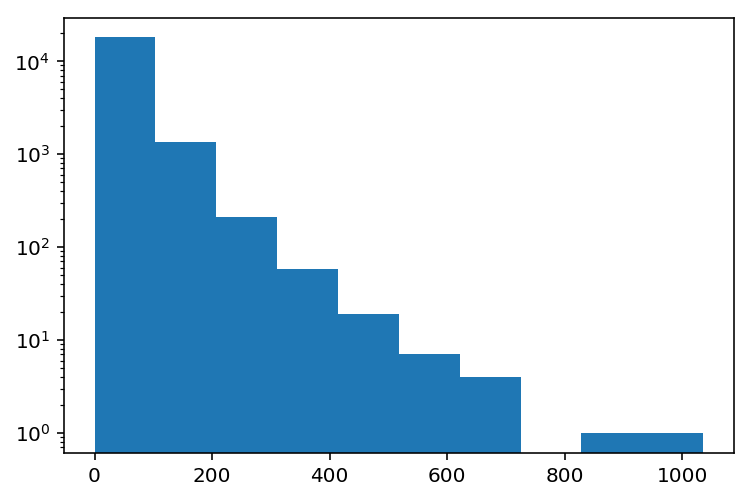

In [12]:
plt.hist(
    [len(c) for passage in wenxuan.flat_passages
        for _,c in passage], log=1
)

The overall distribution range from 0 character to ~1,000 characters, but we only want to focus on shorter range, like 0 ~ 10 characters.

(array([133., 526., 810., 168.,  12., 204., 105.,  86., 144., 325., 334.,
        239., 289., 221., 359., 230., 234., 285., 530.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 19 Patch objects>)

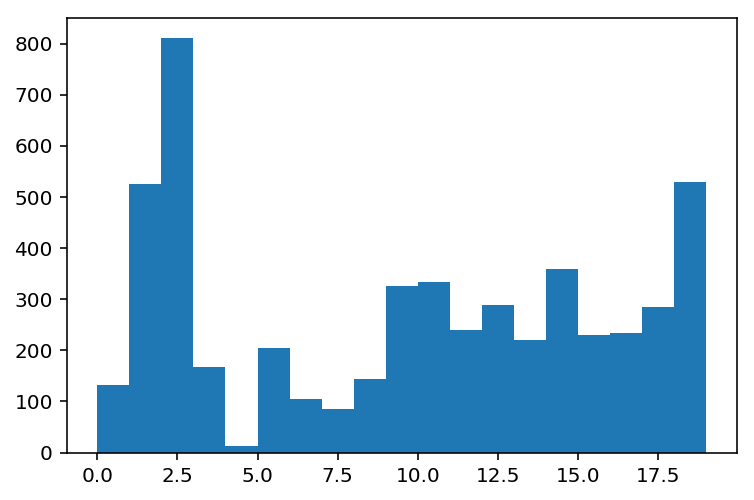

In [13]:
plt.hist(
    [len(c) for passage in wenxuan.flat_passages
        for _,c in passage], 
    bins=range(20)
)

There's a clear gap around 5 characters. Maybe we can try to set the limit to 5 characters.

In [14]:
print([c for passage in wenxuan.flat_passages
    for _,c in passage if len(c) < 5][::5])

['', '', 'Èü≥Ê∏æ', 'Èõâ', 'Ëã¶ÁÅ∞ ', 'ÂæíÈ†∞Âàá', 'Áõ¥Áî®', 'ÂæíÂçó', 'Ë®±Ë¶≤', 'Á´π‰∫§', 'Ë™û', 'Á¥ÜÂÖÉ', 'ÊÅØ‰∫Æ', 'Â∫∏ ', '‰∏ÅÊï¢', 'Ëüª', 'Ëí®', 'Ê®£', '‰ª•ÂÜâ ', '‰ªñÁµê', 'ÁÅå', '‰∏Ä‰ΩúÁë£ ', '‰∫∂', 'Áßª ', 'Â≠êÂªâ', '‰∏ÉÂàÄ', 'Á¥†È†∞', 'Ëµ¥', 'Á•ñÁÆ°', 'ÁÉèÂ§≠', 'Ë®à', 'ÁÉèÁìú ', 'ËÇ≤', 'Âè£Ê±ü', 'ËéΩ', '‰∫îËø¥', 'Âêü', 'Ê∫™', 'Ë¨¨', 'Êõ¥Èª†', 'Âπ∂', 'Âú®ÂÆò', 'Âª∑', 'Ë¨π', 'ÈÅ≤', 'Â¶ÇÊ∂å', 'È™® ', 'ÂëºÁ≠î', 'ÊµÅ', 'ÈöÖ', 'Ê±ô', 'Â∞á', '‰øù', 'ÂêêÈõû', 'ÂæíÊø´', 'Ëñõ', 'Áõ¥ÊóÖ ', '‰πãÈ§ò', 'ËêçË®à', 'Ê∏†Ëàâ', 'ÊÆ∫', '‰ªïËßí', 'ÂäõÈÅî', 'ÈÄµ', 'ÂéªËÅ≤', 'Ëé´Ëí≤', 'ÁÉèË¶Ω', 'ÊñºÊñá', 'ËÉ°ÂÖß', 'Áîü', 'ÂÇ∑', 'ÈÇ™', 'Ê≠•‰∫§', 'Ë≥áË¶© ', 'Ë®±Âäõ', 'ÊïÖËù∂', 'Âïº', 'ËÅä', 'ÊôÆÈÉé', 'ÂøÉÁßª', 'Âëº‰∫û', '‰∫éÂè•', 'Â∞á', 'Â¢≥ ', '‰∫éÈ¨º', 'Ëã¶Ê™ª', 'Ëã¶Âêé', 'Ëé´Êßã', 'Âè•', 'ÂÖ¨ÈÅî ', 'Áõà', 'Á¥ô', 'Â∞â', 'ÊñºÂ†Ø', 'Èü≥Ëüª ', 'Â∞ã', '‰∏ô', '‰øä', 'Èü≥Ë®ó', 'ÂÅâ', 'Á¥†', 'Â±Ö', 'Ë®±Âãø', 'Âπ≥', 'Áî≤', 'ÁÉèÊÑü', 'Âè§ÁÅ´', 'ËìÑ', 'Ê±∫', '‰∫îËìã', 'Ê≠•Â∞ç', 'ÂëºÂÖâ', 'ÁøäÈÅµ', 'Áõ¥Ê∞è', 'Êä

It seems ok, but we noticed 3 character phrases were the phrases contained "Âàá" or "Âèç" or "‰Ωú" or the decomposition of the rare characters. Also, we have to replace " " with "" and replace all punctuations. The irregularities are 'ÂÖ∂‰∏â„ÄÇ', 'ÂÖ∂ÂÖ´„ÄÇ', 'ÂÖ∂ÂÖ´„ÄÇ', 'ÂÖ∂ÂÖ≠„ÄÇ', 'ÂÖ∂‰πù„ÄÇ', 'ÂÖ∂‰∏É„ÄÇ', 'ÂÖ∂Âõõ„ÄÇ', I do not have a good strategy to strip them in current stage.

In [16]:
print([c for passage in wenxuan.flat_passages
    for _,c in passage if len(c) == 3])

['ÂâáÂ∑•Âàá', 'È¶¨Èª®Âàá', '‰∏É‰∫¶Âàá', 'ÊÄùË°çÂàá', '‰∫°Á¶π ', 'Ëã¶ÁÅ∞ ', 'ÂæíÈ†∞Âàá', '‰ª•ÂÜâ ', '‰∏Ä‰ΩúÈ©Ö', 'ÁâõÂàóÂàá', 'ÊâÄ‰∫§Âàá', 'ÂÖ∂Á≠Ü ', 'Ëí≤Ëëõ ', 'Â∑®ÂÆú ', 'Â≠ê‰æØ ', 'Â≠êÂ∞è ', 'ÁÉèÁìú ', 'ÁÉè‰∫§ ', '‰πùÂÖ≠ ', 'Â•áÊÆû ', 'Ëá™Âêù ', 'Áü•ÊóÖ ', 'Ëã¶Êú≠ ', 'Ê≠•Ë¶ì ', 'ÊâÄËüπ ', 'Áõ¥ÊóÖ ', 'ÈôüÊªë ', 'Â∞∏ÁÑ∂ ', 'ÊñºÂïè ', 'Ê±ÇÁô∏ ', 'Âè§ÁÜí ', 'Èü≥Êó® ', 'Êâ∂Âàé ', 'Ë≥áË¶© ', 'ÊòåÂøó ', 'Âú®ÂÆó ', 'Ê≠¶Ëìã ', 'Â∫¶ÁæÖ ', 'Ë®±‰∫é ', 'ËÉ°Ââõ ', 'ÂæíËò≠ ', 'ÂÖ¨ÈÅî ', 'Êµ¶Ë¶ì ', 'ÂåπÂêÑ ', 'Èü≥Ëüª ', 'Âú®Áàµ ', 'ÂëºÊÅ≠Âàá', 'Ë©ûÁø†Âàá', '‰ª•ËâØÂàá', 'ÁÉèÊúóÂàá', 'Âè§‰æØ„ÄÇ', '‰∏ÄÈæçÂèç', 'Âè§ÈõÖ ', '‰ª•‰∏ä ', '‰∏ÅÈÅî ', '‰∏ÉÊÑüÂàá', 'ÂçëÈÅô ', '‰∏ÅÈÑß ', 'ÂäõÈ¨º ', '‰∫°Âå™ ', '‰∏òËªå ', '‰∏ÉÊûó ', '‰πÉÊúó ', 'ÂΩºËãó ', '‰ªñÁ≠îÔºå', '‰πô‰∫é ', 'ÂúüÂê´ ', 'Â•¥ÂÜ∑ ', 'ÂºèÊüì ', 'Ëé´Ê≥† ', 'Â≠êÂ∑• ', '\uf4d1\uf6a4‰∏ç', 'ÂëºÁîò ', 'ÂÖ∑ÂÅ¥ ', 'Ë°å\uf6a5Á´•', 'ÁöÆÁæ© ', 'Â∏ÇÂ∞à ', 'Âè§Êó¶ ', 'ÂçáË±â ', '‰πùÊ∞∏ ', '‰∏òÊÆû ', 'ÂäõËπî ', 'ÂÖ∂‰∏â„ÄÇ', 'ÂÖ∂ÂÖ´„ÄÇ', 'ÂÖ∂ÂÖ´„ÄÇ', 'ÂÖ∂ÂÖ≠„ÄÇ', 

## Punctuations Counting

The followings were the tricky things I have done. The hypothesis here was that sound glosses could be divided into 2 categories:
- **Only sound glosses in the comments**: we would get zero or one punctuation. (mistakes‚Åá why putting punctuations in sound glosses ü§∑)
- **Sound glosses before ÊùéÂñÑ commentary**: we could split `„ÄÇ` and get the sound glosses before first period. We should only the zero punctuation for sound glosses in this case.

So, this function simply count the total number of punctuations in a string based on items in `pun_bag`.

In [17]:
def punctuation_count(phrase, pun_bag = {"„ÄÅ","„ÄÇ", "Ôºå", "Ôºü", "Ôºö", "Ôºõ", "„Äå", "„Äç"}):
    '''Count num punctuactions in phrase based on a given pun_bag'''
    return sum(phrase.count(p) for p in pun_bag)

punctuation_count('Êù±ËßÄÊº¢Ë®òÊõ∞ÔºöÊ∞∏Âπ≥‰∫åÂπ¥ÔºåË©îÊõ∞ÔºöÁôªÈùàËá∫ÔºåÊ≠£ÂÑÄÂ∫¶„ÄÇ‰ºëÂæµÔºåÂ∑≤Ë¶ã‰∏äÊñá„ÄÇ') # Yeh, 7 punctuations

7

So, my suggestion for dividing these two types of commentaries are like this:

In [18]:
def test(text, comment):
    if  (punctuation_count(comment) < 2 and # only count 0 or 1 punctuation
        len(re.sub(r"[„ÄÅ„ÄÇÔºåÔºüÔºöÔºõ„Äå„Äç]", "", comment.replace(" ", ""))) < 5 and  # restrict comment not longer than chars
        comment != ""): # do not count ""
        return (text[-1], comment)

    elif (punctuation_count(comment.split("„ÄÇ")[0]) == 0 and  # if there's no punctuation before period
        0 < len(comment.split("„ÄÇ")[0]) < 5): # if the length of comment before period < 5 and > 0
        return (text[-1], comment.split("„ÄÇ")[0])

    else: return None

# case 1
text, comment = wenxuan.flat_passages[29][45]
print("CASE 1:", text, comment, test(text, comment), "\n")

# case 2
text, comment = wenxuan.flat_passages[29][-12]
print("CASE 2:", text, comment, test(text, comment), "\n")

CASE 1: ‰®¥ ÂæíÊúÉ ('‰®¥', 'ÂæíÊúÉ') 

CASE 2: Ê≠∑ÂàóËæüËÄåË´ñÂäüÔºåÁÑ°‰ªäÊó•‰πãËá≥Ê≤ª Áõ¥‰πãÂèç„ÄÇÂ∞ÅÁ¶™Êõ∏Êõ∞ÔºöÊ≠∑ÈÅ∏ÂàóËæü„ÄÇÊùéÂ∞§Âπ≥Ê®ÇËßÄË≥¶Êõ∞ÔºöÊä´ÂÖ∏Á±ç‰ª•Ë´ñÂäüÔºåËìãÁΩîÂèä‰πéÂ§ßÊº¢„ÄÇËéäÂ≠êÊõ∞ÔºöÂÆπÊàêÊ∞è„ÄÅÂ§ßÂ∫≠Ê∞èÔºåËã•Ê≠§ÊôÇËá≥Ê≤ª‰πü„ÄÇ ('Ê≤ª', 'Áõ¥‰πãÂèç') 



The hilarious thing is that `text[-1]` may refer to punctuation. ü§¶‚Äç

In [19]:
for passage in wenxuan.flat_passages[:5]:
    for text, comment in passage:
        if test(text, comment) != None:
            print(test(text, comment), "What's going on?", text)

('ÂÜ†', 'Âè§‰∫Ç') What's going on? ÂÖ∂Èô∞ÂâáÂÜ†
('Âµï', 'Â≠êÁ¥Ö') What's going on? ‰ª•‰πùÂµï
('ËßÄ', 'Âè§‰∫Ç') What's going on? ÔºåÈô™‰ª•ÁîòÊ≥âÔºå‰πÉÊúâÈùàÂÆÆËµ∑‰πéÂÖ∂‰∏≠„ÄÇÁß¶Êº¢‰πãÊâÄÊ•µËßÄ
('Áàì', 'Èü≥Ëâ∑') What's going on? Áôº‰∫îËâ≤‰πãÊ∏•ÂΩ©ÔºåÂÖâÁàì
('„ÄÇ', 'Ë¨ÇÂÖâÊ≠¶‰πü') What's going on? ÊñºÊòØËÅñÁöá‰πÉÊè°‰πæÁ¨¶ÔºåÈó°Âù§Áèç„ÄÇÊä´ÁöáÂúñÔºåÁ®ΩÂ∏ùÊñá„ÄÇËµ´ÁÑ∂ÁôºÊÜ§ÔºåÊáâËã•ËààÈõ≤„ÄÇÈúÜÊìäÊòÜÈôΩÔºåÊÜëÊÄíÈõ∑Èúá„ÄÇ
('Âµï', 'ÂâáÂ∑•Âàá') What's going on? Áß¶Â∂∫‰πùÂµï


## Avoid Attaching Sound Glosses to Punctuations ü§¶‚Äç

So the idea here is simple, just search backward and find the the character which is not a punctuation.

In [20]:
def _backward_char_search(phrase, exclude = {" ", "„ÄÅ","„ÄÇ", "Ôºå", "Ôºü", "Ôºö", "Ôºõ", "„Äå", "„Äç"}):
    for char in phrase[::-1]:
        if char not in exclude:
            return char
        else: continue

In [21]:
# Try it!
_backward_char_search("ÊñºÊòØËÅñÁöá‰πÉÊè°‰πæÁ¨¶ÔºåÈó°Âù§Áèç„ÄÇÊä´ÁöáÂúñÔºåÁ®ΩÂ∏ùÊñá„ÄÇËµ´ÁÑ∂ÁôºÊÜ§ÔºåÊáâËã•ËààÈõ≤„ÄÇÈúÜÊìäÊòÜÈôΩÔºåÊÜëÊÄíÈõ∑Èúá„ÄÇ")

'Èúá'

Yeah.

## Wrap All Things Up

In [22]:
def _punctuation_count(phrase, pun_bag = {"„ÄÅ","„ÄÇ", "Ôºå", "Ôºü", "Ôºö", "Ôºõ", "„Äå", "„Äç"}):
    '''Count num punctuactions in phrase based on a given pun_bag'''
    return sum(phrase.count(p) for p in pun_bag)

def _backward_char_search(phrase, exclude = {" ", "„ÄÅ","„ÄÇ", "Ôºå", "Ôºü", "Ôºö", "Ôºõ", "„Äå", "„Äç"}):
    '''Return the frist char which is not in exclude.'''
    for char in phrase[::-1]:
        if char not in exclude:
            return char
        else: continue            

def _sound_glosses_check(text, comment):
    '''Check the comment is a sound glosses or not.
    If it is a sound glosses, return (character reffered to, sound) as a tuple.'''
    if  (_punctuation_count(comment) < 2 and 
        len(re.sub(r"[„ÄÅ„ÄÇÔºåÔºüÔºöÔºõ„Äå„Äç]", "", comment.replace(" ", ""))) < 5 and 
        comment != ""):
        return _backward_char_search(text), re.sub(r"[„ÄÅ„ÄÇÔºåÔºüÔºöÔºõ„Äå„Äç]", "", comment)
        
    elif (_punctuation_count(comment.split("„ÄÇ")[0]) == 0 and 
        0 < len(comment.split("„ÄÇ")[0]) < 5):
        return _backward_char_search(text), comment.split("„ÄÇ")[0]
    
    else: return None
    
# A place to save sound glosses    
sound_glosses = []

for i,passage in enumerate(wenxuan.flat_passages):
    for p,c in passage:
        # check if c is a single phrase comment
        sound_gloss = _sound_glosses_check(p, c)
        if sound_gloss != None:
            sound_glosses.append((i,) + sound_gloss)

Apparently, comments with length 4 are not sound glosses. üòë

In [23]:
print([c for i,p,c in sound_glosses if len(c) == 4][::5])

['Ë¨ÇÂÖâÊ≠¶‰πü', 'Â∞èÊ∏öÊõ∞ÈòØ', '‰æ≤‰πãË®ÄÂñÑ', 'Ê≠¢ÊààÊõ∞Ê≠¶', 'Â§ßÈπøÊõ∞È∫ü', 'Ë®ÄËá™ÊÅ£‰πü', 'ÁöÜÁ´πÂêç‰πü', 'Ê≠£Ê©´Â∞Ñ‰πü', 'Ë¨ÇÊó•Á£æ‰πü', 'ÂÖ∂Ëâ≤ÁãÄ‰πü', 'Ë¨ÇÂª∫Âüé‰πü', 'Ë®ÄÂ∞áÊõâ‰πü', 'Ë®ÄÂ§±Â∫¶‰πü', 'Ë™°Áæ§Âè∏‰πü', 'ÈÄùË¨ÇÊ≠ª‰πü', 'Ë¨ÇÊÉ†Â∏ù‰πü', 'Ë®ÄÁÑ°Â∏∏‰πü', 'Ë®£ËàáÊ±∫Âêå', 'ÈúûÊàñÁÇ∫ËèØ', 'Âú®ËÉåÊõ∞Ë¢´', 'Á®ΩÁ•ûÊòé‰πü', 'ÂêêË©ûÊÉÖ‰πü', 'ÂààËíøËèÖ‰πü', 'Ë¢´ÂàëÊàÆ‰πü', 'ÊâøÈ°èËâ≤‰πü', 'ËΩâÈö®‰øó‰πü', 'ÊôÆÊÑõÁúæ‰πü', 'ÂÆâÊ≠•Âæê‰πü', 'Ë≤®Ë≥ÇË°å‰πü', 'Â±ÖÊúùÂ†Ç‰πü', 'ÊâÄÂøµÊÖÆ‰πü', 'ÁöØÈª¥Èªë‰πü', 'Âø†ÁµúÂ∑±‰πü', 'Èö®‰øóÊñπÂúú', 'ÂæûÂÖ∂‰øó‰πü', 'ÊãÇÂúüËä•‰πü', 'Ë∫´Ê∂àÁàõ‰πü', 'Ê≤êÊµ¥ÈôûÊúù', 'Êü¥Ê£òÁÇ∫Âè¢', 'ÈúßÊ∞£Êòß‰πü', 'ÂøÉÂâùÂàá‰πü', '‰∫§ÈåØÊâ∂Áñé', 'Ëµ∞‰ΩèÊÆäÁï∞', 'È†ìÁå∂Êç®‰πü', 'Ë¨ÇÂ§ßÁΩµ‰πü', 'Ë°ÄÂç≥Ê∑ö‰πü', 'ÂÖ¨Ë¨ÇÊõπÊìç', 'Ë¨ÇÈúçÂÖâ‰πü', 'Ë®ÄÈõ£Ëæ≠‰πü', 'Á¶ÆË®òÊñá‰πü']


In [24]:
## Just repeat the code above but changing the condition for len of the sound glosses
def _sound_glosses_check(text, comment):
    '''Check the comment is a sound glosses or not.
    If it is a sound glosses, return (character reffered to, sound) as a tuple.'''
    if  (_punctuation_count(comment) < 2 and 
        len(re.sub(r"[„ÄÅ„ÄÇÔºåÔºüÔºöÔºõ„Äå„Äç]", "", comment.replace(" ", ""))) < 4 and 
        comment != ""):
        return _backward_char_search(text), re.sub(r"[„ÄÅ„ÄÇÔºåÔºüÔºöÔºõ„Äå„Äç]", "", comment)
        
    elif (_punctuation_count(comment.split("„ÄÇ")[0]) == 0 and 
        0 < len(comment.split("„ÄÇ")[0]) < 4):
        return _backward_char_search(text), comment.split("„ÄÇ")[0]
    
    else: return None
    
# A place to save sound glosses    
sound_glosses = []

for i,passage in enumerate(wenxuan.flat_passages):
    for p,c in passage:
        # check if c is a single phrase comment
        sound_gloss = _sound_glosses_check(p, c)
        if sound_gloss != None:
            sound_glosses.append((i,) + sound_gloss)

In [25]:
print(sound_glosses[::15])

[(1, 'ÂÜ†', 'Âè§‰∫Ç'), (8, 'ËΩ¢', 'Èü≥Ê≠∑'), (9, 'Ëπê', 'Á±ç'), (9, 'ÂèÉ', 'ÊâÄ‰ªä'), (9, 'Ë†Ø', 'Ëí≤‰Ω≥'), (9, 'ËªØ', 'ÊôÆËÄï'), (9, 'Èâ†', 'ÊñºËâØÂàá'), (9, 'Á•ß', 'ÂêêÂ†Ø'), (9, '‰Ω∂', 'ÂÖ∂Ê†ó'), (9, 'ÊñÆ', 'ÂÅ¥Ëßí'), (9, 'Èô¨', 'Â≠ê‰æØ '), (9, 'Ë¶Ü', 'Ëµ¥'), (9, 'Ëòñ', 'È≠öÁ´≠'), (10, 'Èõò', 'ÁÉèÈÉ≠'), (10, 'Â∑á', 'Ë®±ÂÆú'), (10, '\ue0c0', '‰∫îÁµê'), (10, 'Êüç', 'ÊñºÂÖ©'), (10, 'Á±†', 'Èæç'), (10, 'Êøú', 'Ëá™Âêù '), (10, 'Ê∑ö', 'ÂäõË®à'), (10, 'Ëñ†', 'ÁÖ©'), (10, 'Èµæ', 'ÊòÜ'), (10, 'Âª°', 'Ê≠¶'), (10, 'Êªç', 'Áß©Â±•'), (10, 'ÈÜ¢', 'Êµ∑'), (11, 'Áï∂', 'ÂéªËÅ≤'), (12, 'Â¥õ', 'È≠öÁâ©'), (12, 'ÊπØ', 'ÂÇ∑'), (12, 'Ëí©', 'Ë≥áË¶© '), (12, 'Ëçë', 'Âïº'), (12, 'Ê•ü', '‰∫≠ '), (12, 'Êî¢', 'Âú®ÂÆò'), (12, 'Â°è', 'ÊÑ∑'), (12, 'Ê¶î', 'ÈÉé '), (12, 'Êë´', 'Ë¶è'), (12, 'ÊúÖ', 'Á∂∫Âàó'), (12, 'Êëõ', 'ÂãëÈõ¢'), (13, 'Èºä', 'Ëæü'), (13, 'ÊÆ∑', '‰∏äËÅ≤'), (13, 'Á≠ë', 'Á´π'), (13, 'Á©ó', 'Ë©ûÁø†Âàá'), (13, 'ÈÖã', 'Ëá™Áî±'), (13, 'Ëëó', 'Ê±†Ëëó'), (13, 'Á∑°', 'ÂØÜÂ∑æ'), (13, 'Âñë', 'Âªï'), (14, 'Êπ´',

Yeah, so far seems ok. 

## Put back to WenXuan Class

This is the part of the WenXuan class. This part is the class methods we defined in this notebook:

```python 
class WenXuan(Book):

    ...

    def _punctuation_count(self, phrase, pun_bag = {"„ÄÅ","„ÄÇ", "Ôºå", "Ôºü", "Ôºö", "Ôºõ", "„Äå", "„Äç"}):
        '''Count num punctuactions in phrase based on a given pun_bag'''
        return sum(phrase.count(p) for p in pun_bag)

    def _backward_char_search(self, phrase, exclude = {" ", "„ÄÅ","„ÄÇ", "Ôºå", "Ôºü", "Ôºö", "Ôºõ", "„Äå", "„Äç"}):
        '''Return the frist char which is not in exclude.'''
        for char in phrase[::-1]:
            if char not in exclude:
                return char
            else: continue       

    def _sound_glosses_check(self, text, comment):
        '''Check the comment is a sound glosses or not.
        If it is a sound glosses, return (character reffered to, sound) as a tuple.'''
        if  (self._punctuation_count(comment) < 2 and 
            len(re.sub(r"[„ÄÅ„ÄÇÔºåÔºüÔºöÔºõ„Äå„Äç]", "", comment.replace(" ", ""))) < 4 and 
            comment != ""):
            return self._backward_char_search(text), re.sub(r"[„ÄÅ„ÄÇÔºåÔºüÔºöÔºõ„Äå„Äç]", "", comment)

        elif (self._punctuation_count(comment.split("„ÄÇ")[0]) == 0 and 
            0 < len(comment.split("„ÄÇ")[0]) < 4):
            return self._backward_char_search(text), comment.split("„ÄÇ")[0]

        else: return None

    def extract_sound_glosses(self):
        # A place to save sound glosses    
        self.sound_glosses = []

        for i,passage in enumerate(self.flat_passages):
            for p,c in passage:
                # check if c is a single phrase comment
                sound_gloss = self._sound_glosses_check(p, c)
                if sound_gloss != None:
                    self.sound_glosses.append((i,) + sound_gloss)     
```

## (Added) Take Out Sound Glosses

We not only want to get a bag of sound glosses as a dictionary but also want to remove sound gloss sentences in the original texts. To do that, we can use a new list to store the phrases with sound glosses and concatenate them to the next phrase without sound glosses.

In [26]:
passage = wenxuan.flat_passages[5]

In [27]:
# A place to save sound glosses    
new_passage = []

p_preivous_buffer = ''
for j,(p,c) in enumerate(passage):
    # check if c is a single phrase comment
    sound_gloss = _sound_glosses_check(p, c)
    if sound_gloss != None:
        p_preivous_buffer += p
    else:
        new_passage.append((p_preivous_buffer + p, c))
        p_preivous_buffer = ''

In [28]:
passage

[('‰πÉÁ∂ìÈùàËá∫ÔºåÈùàËá∫Êó¢Â¥á„ÄÇ', 'ÊØõË©©Êõ∞ÔºöÁ∂ìÂßãÈùàËá∫ÔºåÁ∂ì‰πãÁáü‰πã„ÄÇ'),
 ('Â∏ùÂã§ÊôÇÁôªÔºåÁà∞ËÄÉ‰ºëÂæµ„ÄÇ', 'Êù±ËßÄÊº¢Ë®òÊõ∞ÔºöÊ∞∏Âπ≥‰∫åÂπ¥ÔºåË©îÊõ∞ÔºöÁôªÈùàËá∫ÔºåÊ≠£ÂÑÄÂ∫¶„ÄÇ‰ºëÂæµÔºåÂ∑≤Ë¶ã‰∏äÊñá„ÄÇ'),
 ('‰∏âÂÖâÂÆ£Á≤æÔºå‰∫îË°åÂ∏ÉÂ∫è„ÄÇ', 'Ê∑ÆÂçóÂ≠êÊõ∞ÔºöÂ§´ÈÅìÔºåÁ¥òÂÆáÂÆôËÄåÁ´†‰∏âÂÖâ„ÄÇÈ´òË™òÊõ∞Ôºö‰∏âÂÖâÔºåÊó•„ÄÅÊúà„ÄÅÊòü‰πü„ÄÇÂ∞öÊõ∏Êõ∞Ôºö‰∫îË°åÔºö‰∏ÄÊõ∞Ê∞¥Ôºå‰∫åÊõ∞ÁÅ´Ôºå‰∏âÊõ∞Êú®ÔºåÂõõÊõ∞ÈáëÔºå‰∫îÊõ∞Âúü‰πü„ÄÇ'),
 ('ÁøíÁøíÁ••È¢®ÔºåÁ•ÅÁ•ÅÁîòÈõ®„ÄÇ',
  'ÊØõË©©Êõ∞ÔºöÁøíÁøíË∞∑È¢®„ÄÇÁ¶ÆÊñóÂ®ÅÂÑÄÊõ∞ÔºöÂêõ‰πòÁÅ´ËÄåÁéãÔºåÂÖ∂ÊîøÈ†åÂπ≥ÔºåÂâáÁ••È¢®Ëá≥„ÄÇÂÆãÂùáÊõ∞ÔºöÂç≥ÊôØÈ¢®‰πüÔºåÂÖ∂‰æÜÈï∑È§äËê¨Áâ©„ÄÇÊØõË©©Êõ∞ÔºöËààÈõ®Á•ÅÁ•Å„ÄÇÂ∞öÊõ∏ËÄÉÈùàÁáøÊõ∞ÔºöÁÜíÊÉëÈ†ÜË°åÔºåÁîòÈõ®ÊôÇ‰πü„ÄÇ'),
 ('ÁôæÁ©ÄËìÅËìÅÔºåÂ∫∂ËçâËïÉ', 'Èü≥ÁπÅ'),
 ('Âª°', 'Èü≥Ê≠¶„ÄÇÈüìË©©Êõ∞ÔºöÂ∏•ÊôÇËæ≤Â§´ÔºåÊí≠Âé•ÁôæÁ©Ä„ÄÇËñõÂêõÊõ∞ÔºöÁ©ÄÈ°ûÈùû‰∏ÄÔºåÊïÖË®ÄÁôæ‰πü„ÄÇÂèàÊõ∞ÔºöËìÅËìÅËÄÖËé™„ÄÇËñõÂêõÊõ∞ÔºöËìÅËìÅÔºåÁõõË≤å‰πü„ÄÇÂ∞öÊõ∏Êõ∞ÔºöÂ∫∂ËçâËïÉÂª°„ÄÇ'),
 ('Â±¢ÊÉüË±äÂπ¥ÔºåÊñºÁöáÊ®ÇËÉ•„ÄÇ', 'ÊØõË©©Êõ∞ÔºöÁ∂èËê¨ÂúãÔºåÂ±¢Ë±êÂπ¥„ÄÇÂèàÊ

In [29]:
new_passage

[('‰πÉÁ∂ìÈùàËá∫ÔºåÈùàËá∫Êó¢Â¥á„ÄÇ', 'ÊØõË©©Êõ∞ÔºöÁ∂ìÂßãÈùàËá∫ÔºåÁ∂ì‰πãÁáü‰πã„ÄÇ'),
 ('Â∏ùÂã§ÊôÇÁôªÔºåÁà∞ËÄÉ‰ºëÂæµ„ÄÇ', 'Êù±ËßÄÊº¢Ë®òÊõ∞ÔºöÊ∞∏Âπ≥‰∫åÂπ¥ÔºåË©îÊõ∞ÔºöÁôªÈùàËá∫ÔºåÊ≠£ÂÑÄÂ∫¶„ÄÇ‰ºëÂæµÔºåÂ∑≤Ë¶ã‰∏äÊñá„ÄÇ'),
 ('‰∏âÂÖâÂÆ£Á≤æÔºå‰∫îË°åÂ∏ÉÂ∫è„ÄÇ', 'Ê∑ÆÂçóÂ≠êÊõ∞ÔºöÂ§´ÈÅìÔºåÁ¥òÂÆáÂÆôËÄåÁ´†‰∏âÂÖâ„ÄÇÈ´òË™òÊõ∞Ôºö‰∏âÂÖâÔºåÊó•„ÄÅÊúà„ÄÅÊòü‰πü„ÄÇÂ∞öÊõ∏Êõ∞Ôºö‰∫îË°åÔºö‰∏ÄÊõ∞Ê∞¥Ôºå‰∫åÊõ∞ÁÅ´Ôºå‰∏âÊõ∞Êú®ÔºåÂõõÊõ∞ÈáëÔºå‰∫îÊõ∞Âúü‰πü„ÄÇ'),
 ('ÁøíÁøíÁ••È¢®ÔºåÁ•ÅÁ•ÅÁîòÈõ®„ÄÇ',
  'ÊØõË©©Êõ∞ÔºöÁøíÁøíË∞∑È¢®„ÄÇÁ¶ÆÊñóÂ®ÅÂÑÄÊõ∞ÔºöÂêõ‰πòÁÅ´ËÄåÁéãÔºåÂÖ∂ÊîøÈ†åÂπ≥ÔºåÂâáÁ••È¢®Ëá≥„ÄÇÂÆãÂùáÊõ∞ÔºöÂç≥ÊôØÈ¢®‰πüÔºåÂÖ∂‰æÜÈï∑È§äËê¨Áâ©„ÄÇÊØõË©©Êõ∞ÔºöËààÈõ®Á•ÅÁ•Å„ÄÇÂ∞öÊõ∏ËÄÉÈùàÁáøÊõ∞ÔºöÁÜíÊÉëÈ†ÜË°åÔºåÁîòÈõ®ÊôÇ‰πü„ÄÇ'),
 ('ÁôæÁ©ÄËìÅËìÅÔºåÂ∫∂ËçâËïÉÂª°Â±¢ÊÉüË±äÂπ¥ÔºåÊñºÁöáÊ®ÇËÉ•„ÄÇ', 'ÊØõË©©Êõ∞ÔºöÁ∂èËê¨ÂúãÔºåÂ±¢Ë±êÂπ¥„ÄÇÂèàÊõ∞ÔºöÊñºÁöáÊôÇÂë®„ÄÇÂèàÊõ∞ÔºöÂêõÂ≠êÊ®ÇËÉ•„ÄÇ')]

Wow, I notice we should take care of the punctuations inside the sound glosses. Otherwise, this 'ÁôæÁ©ÄËìÅËìÅÔºåÂ∫∂ËçâËïÉÂª°Â±¢ÊÉüË±äÂπ¥ÔºåÊñºÁöáÊ®ÇËÉ•„ÄÇ' would frequently happen.

## (Added) Bring Back the Inline Punctuations

In [30]:
sound_glosses = []
new_flat_passages = []

for i,passage in enumerate(wenxuan.flat_passages):
    # A place to save sound glosses    
    new_passage = []
    p_preivous_buffer = ''
    
    for j,(p,c) in enumerate(passage):
        # check if c is a single phrase comment
        sound_gloss = _sound_glosses_check(p, c)
        if sound_gloss != None:
            sound_glosses.append((i,) + sound_gloss)
            p_preivous_buffer += p

            # CASE 2: Inline Sound Glosses
            if len(c) >= 5:
                if p_preivous_buffer[-1] != "„ÄÇ":
                    p_preivous_buffer += "„ÄÇ"

            # CASE 1: Single Phrase
            elif re.search(r"(.+)([„ÄÅ„ÄÇÔºåÔºüÔºöÔºõ„Äå„Äç])", c) != None:
                match = re.search(r"(.+)([„ÄÅ„ÄÇÔºåÔºüÔºöÔºõ„Äå„Äç])", c)
                p_preivous_buffer += match.group(2)

        else:
            new_passage.append((p_preivous_buffer + p, c))
            p_preivous_buffer = ''
            
    new_flat_passages.append(new_passage)

In [31]:
for i,passage in enumerate(new_flat_passages):
    for p,_ in passage:
        for match in re.finditer(r"[„ÄÅ„ÄÇÔºåÔºüÔºöÔºõ][„ÄÅ„ÄÇÔºåÔºüÔºöÔºõ]", p):
            print(i, p)

8 Âµ≥Â≥®Â¥®Â∂´Ôºå„ÄÇÁΩîË≠òÊâÄÂâá„ÄÇ
71 ÂóüÁàæÂ∫∂Â£´ÔºåËÉ°ÂØßËá™ËàçÔºü„ÄÇ‰ªÅÈÅì‰∏çÈÅêÔºåÂæ∑Ëº∂Â¶ÇÁæΩ„ÄÇÊ±ÇÁÑâÊñØËá≥ÔºåÁúæÈÆÆÂÖãËàâ„ÄÇ
71 Êú´‰ºé‰πãÂ¶ôÔºåÂãïÁâ©ÊáâÂøÉ„ÄÇÁ†îÁ≤æË∫≠ÈÅìÔºåÂÆâÊúâÂπΩÊ∑±Ôºü„ÄÇÂÆâÂøÉÊÅ¨Ëï©ÔºåÊ£≤ÂøóÊµÆÈõ≤„ÄÇÈ´î‰πã‰ª•Ë≥™ÔºåÂΩ™‰πã‰ª•Êñá„ÄÇ
75 ÁÇ∫Ê≥ïÂèóÊÉ°ÔºåË™∞Ë¨ÇËçºËã¶Ôºü„ÄÇÂìÄÊ≠§ÈªéÂÖÉÔºåÁÑ°ÁΩ™ÁÑ°Ëæú„ÄÇ
75 ÁñáÁúüÂèØÊé©ÔºüÂ≠∞ÂÅΩÂèØ‰πÖÔºü„ÄÇÊó¢ÂæµÁàæËæ≠ÔºåÊó¢ËîΩÁàæË®ü„ÄÇ
136 Â±±‰∏≠Âí∏ÂèØÊÇÖÔºåË≥ûÈÄêÂõõÊôÇÁßª„ÄÇÊò•ÂÖâÁôºÂ£üÈ¶ñÔºåÁßãÈ¢®ÁîüÊ°ÇÊûù„ÄÇ„ÄÇÂ§öÂÄºÊÅØÂøÉ‰æ∂ÔºåÁµêÊû∂Â±±‰πãË∂≥„ÄÇ
169 ÈÅäË∑®‰∏âÊò•ÔºåÊÉÖÂõ∫‰∫åÁßã„ÄÇ„ÄÇÁ•óÊâøÁöáÂëΩÔºåÂá∫Á¥çÁÑ°ÈÅï„ÄÇ
178 Â¶ÇÂΩºËò≠ËïôÔºåËºâÊé°ÂÖ∂Ëä≥„ÄÇ„ÄÇËó©Â≤≥‰ΩúÈéÆÔºåËºîÊàë‰∫¨ÂÆ§„ÄÇ
178 ËÑ©Êó•ÊúóÊúàÔºåÊîúÊâãÈÄçÈÅô„ÄÇ„ÄÇËá™ÊàëÈõ¢Áæ§Ôºå‰∫åÂë®‰∫é‰ªä„ÄÇ
179 Â©âÂ≠å‰∫åÂÆÆÔºåÂæòÂæäÊÆøÈó•„ÄÇÈÜ™ÊæÑËé´È•óÔºåÂ≠∞ÊÖ∞È£¢Ê∏¥Ôºü„ÄÇÊòîÂ≠êÂøùÁßÅÔºåË≤ΩÊàëËïôËò≠„ÄÇ
187 ËäªÁãó‰πãË´áÔºåÂÖ∂ÊúÄÂæó‰πéÔºü„ÄÇÂí®‰ΩôËªüÂº±ÔºåÂºóÂÖãË≤†Ëç∑„ÄÇ
187 Êó¢Â≠§ÊàëÂæ∑ÔºåÂèàÈóïÊàëÈÑ∞„ÄÇ„ÄÇÂÖâÂÖâÊÆµÁîüÔºåÂá∫ÂπΩÈÅ∑Âñ¨„ÄÇ
189 ‰ª∞ÊÇ≤ÂÖàÊÑèÔºå‰øØÊÄùË∫´ÊÑÜ„ÄÇ„ÄÇÂ§ßÈàûËºâÈÅãÔºå

It is still not perfect!! ü§®  
However, it would be too complicate if we add too many `if..then..` in to the control flow. We can deal with the duplicate punctuations afterward. 

So, we can update the method as:

```python
    def extract_sound_glosses(self, remove_sound_glosses=True):
        new_flat_passages = []

        for i,passage in enumerate(self.flat_passages):
            # A place to save sound glosses    
            new_passage = []
            p_preivous_buffer = ''

            for j,(p,c) in enumerate(passage):
                # check if c is a single phrase comment
                sound_gloss = self._sound_glosses_check(p, c)
                if sound_gloss != None:
                    p_preivous_buffer += p

                    # CASE 2: Inline Sound Glosses
                    if len(c) >= 5:
                        if p_preivous_buffer[-1] != "„ÄÇ":
                            p_preivous_buffer += "„ÄÇ"

                    # CASE 1: Single Phrase
                    elif re.search(r"(.+)([„ÄÅ„ÄÇÔºåÔºüÔºöÔºõ„Äå„Äç])", c) != None:
                        match = re.search(r"(.+)([„ÄÅ„ÄÇÔºåÔºüÔºöÔºõ„Äå„Äç])", c)
                        p_preivous_buffer += match.group(2)

                else:
                    new_passage.append((p_preivous_buffer + p, c))
                    p_preivous_buffer = ''

            new_flat_passages.append(new_passage)

        if remove_sound_glosses:
            self.flat_passages = new_flat_passages
```

### (Supplementary) Anti-Correlation between the Num of Single Phrase Sound Glosses and Sound Glosses Inline? 

While I was trying to find a page to test the `extract_sound_glosses` function, I found that it is difficult to find a good sample! I almost couldn't find a good sample to test inline sound glosses and single phrase sound glosses at the same time, so I guessed there would be some kind of anti-correlation there.

In [32]:
# store (num_of_single_sound,  num_of_sound_inline)
single_inline_pairs = []

for i,passage in enumerate(wenxuan.flat_passages):
    num_single = 0
    num_inline = 0
    
    for j,(p,c) in enumerate(passage):
        sound_gloss = _sound_glosses_check(p, c)
        if sound_gloss != None:
            
            # check if c is a single phrase comment
            if len(c) >= 5:
                num_inline += 1
                
            # check if c is a single phrase comment
            elif len(c) < 5:
                num_single += 1
                
    single_inline_pairs.append((num_single, num_inline))

Text(0,0.5,'Num of Inline Phrase Sound Glosses in a Page')

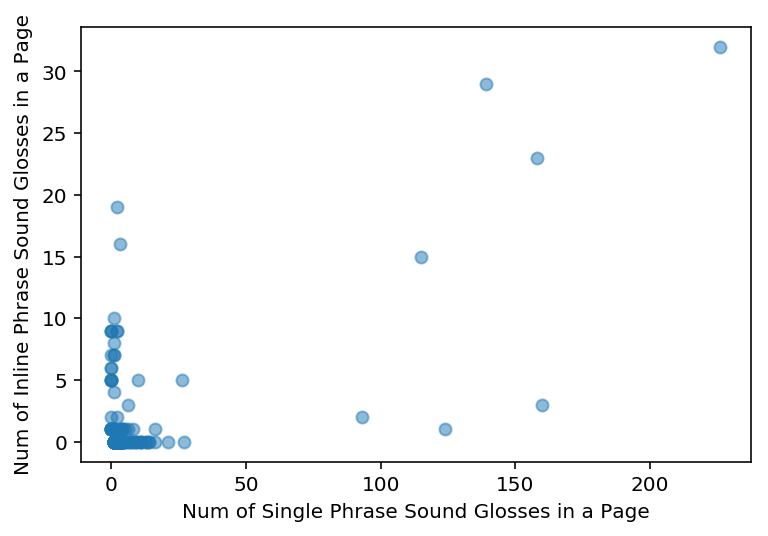

In [33]:
plt.scatter(
    [p[0] for p in single_inline_pairs if sum(p) > 0],
    [p[1] for p in single_inline_pairs if sum(p) > 0], alpha=0.5
 )
plt.xlabel("Num of Single Phrase Sound Glosses in a Page")
plt.ylabel("Num of Inline Phrase Sound Glosses in a Page")

Text(0.5,0,'(Single Phrase Sound Glosses)/(Num of Sound Glosses)')

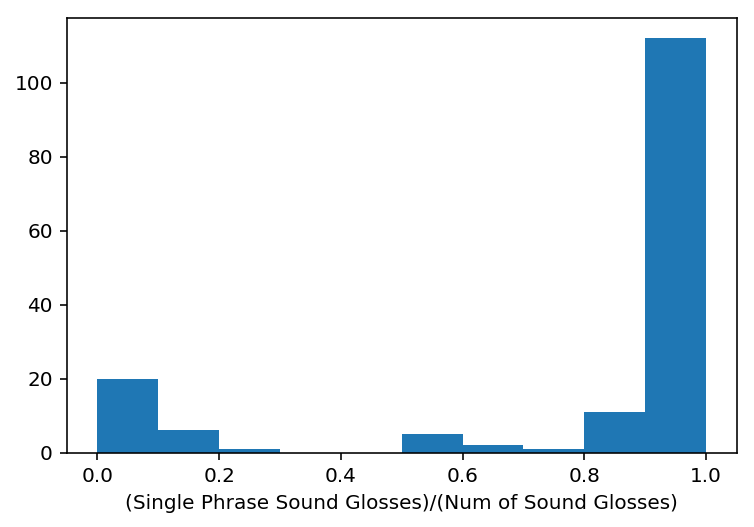

In [34]:
plt.hist([p[0] / sum(p) for p in single_inline_pairs if sum(p) > 0],)
plt.xlabel("(Single Phrase Sound Glosses)/(Num of Sound Glosses)")

It appears that single phrase sound glosses did not bound with inline sound glosses too often. Therefore, in the above histogram, low frequency and high frequency of `(Single Phrase Sound Glosses)/(Num of Sound Glosses)` are clustering as different groups.